In [2]:
import arrow
import netCDF4 as nc
import glob
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:

##load sea and air temperature

tdir = './For_TJ/'

seatemp_RCP45 = nc.Dataset(f'{tdir}NEP36-CanOE_temp_RCP45_2046-2065_monthly_SS.nc')
seatemp_hist = nc.Dataset(f'{tdir}NEP36-CanOE_temp_historical_1986-2005_monthly_SS.nc')

tas_RCP45 = nc.Dataset(f'{tdir}tas_CanRCM4-NAM22_daily_RCP45_2046-2065_107x107_SS.nc')
tas_hist = nc.Dataset(f'{tdir}tas_CanRCM4-NAM22_daily_1986-2005_107x107_SS.nc')


In [6]:
tas_hist

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    CDI: Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.4
    history: Tue Oct 26 17:35:37 2021: cdo sellonlatbox,-128.5,-122.3,47,51.12 ATMDATA/inputs/tas_CanRCM4-NAM22_daily_1986-2005_107x107.nc tas_CanRCM4-NAM22_daily_1986-2005_107x107_SS.nc
Fri Mar 29 16:55:52 2019: cdo fillmiss tmp2.nc tas_CanRCM4-NAM22_daily_1986-2005_107x107.nc
Fri Mar 29 16:55:51 2019: cdo -f nc remapbil,reg_grid2.txt tmp.nc tmp2.nc
Fri Mar 29 16:55:49 2019: cdo div tas_CanRCM4-NAM22_daily_1986-2005.nc -mulc,-1 -subc,1 landmask.nc tmp.nc
Fri Feb 15 17:16:16 2019: cdo -divc,100 sftlf_NAM-22_CCCma-CanESM2_historical_r1i1p1_CCCma-CanRCM4_r2_fx.nc landmask.nc
created: 2012-10-17 16:25:31 by rcm2nc
    description: Average of North American .22 degree resolution data 
    CDO: Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/cdo)
    dimensions(sizes): time(365), lon(26), lat

## Look at 1 day of historical and RCP4.5 air temperature data

Text(0.5, 0.98, 'all in deg C')

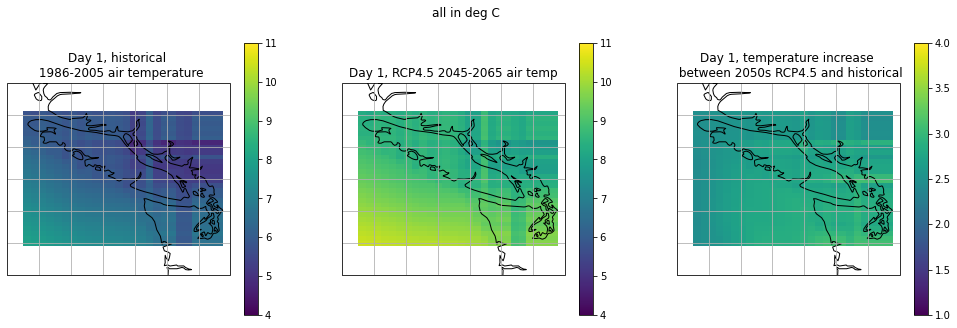

In [7]:
tvmin = 4
tvmax = 11
lat = tas_hist['lat'][:]
lon = tas_hist['lon'][:]-360
lon2d, lat2d = np.meshgrid(lon, lat)
data_hist = tas_hist['tas'][0,:]-273.15
data_RCP45 = tas_RCP45['tas'][0,:]-273.15

#### plot with diffs

central_lon, central_lat = -126, 49
extent = [-129, -122, 46, 52]

plt.figure(figsize=(17, 5))
ax1 = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())

ax1.set_extent(extent)
ax1.gridlines()
ax1.coastlines(resolution='50m')
w = ax1.pcolormesh(lon2d, lat2d, data_hist, vmin = tvmin, vmax = tvmax, transform=ccrs.PlateCarree())
plt.colorbar(w)
ax1.set_title(f'Day 1, historical \n 1986-2005 air temperature')

ax2 = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree())
ax2.set_extent(extent)
ax2.gridlines()
ax2.coastlines(resolution='50m')
w = ax2.pcolormesh(lon2d, lat2d, data_RCP45, vmin = tvmin, vmax = tvmax, transform=ccrs.PlateCarree())
plt.colorbar(w)
ax2.set_title(f'Day 1, RCP4.5 2045-2065 air temp')

ax2 = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree())
ax2.set_extent(extent)
ax2.gridlines()
ax2.coastlines(resolution='50m')
w = ax2.pcolormesh(lon2d, lat2d, data_RCP45-data_hist, vmin = 1, vmax = 4, transform=ccrs.PlateCarree())
ax2.set_title(f'Day 1, temperature increase \n between 2050s RCP4.5 and historical')
plt.colorbar(w)
plt.suptitle('all in deg C')

## winter (jan-feb) and summer (jun-jul) averages

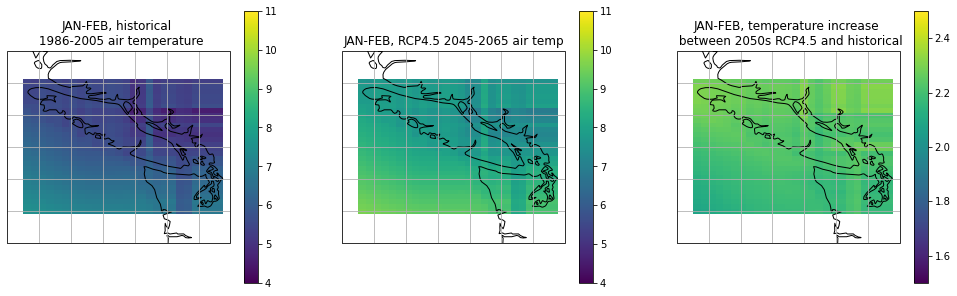

In [8]:
tvmin = 4
tvmax = 11
lat = tas_hist['lat'][:]
lon = tas_hist['lon'][:]-360
lon2d, lat2d = np.meshgrid(lon, lat)
data_hist = np.nanmean(tas_hist['tas'][0:60,:], axis = 0)-273.15
data_RCP45 = np.nanmean(tas_RCP45['tas'][0:60,:], axis = 0)-273.15

#### plot with diffs

central_lon, central_lat = -126, 49
extent = [-129, -122, 46, 52]

plt.figure(figsize=(17, 5))
ax1 = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())

ax1.set_extent(extent)
ax1.gridlines()
ax1.coastlines(resolution='50m')
w = ax1.pcolormesh(lon2d, lat2d, data_hist, vmin = tvmin, vmax = tvmax, transform=ccrs.PlateCarree())
plt.colorbar(w)
ax1.set_title(f'JAN-FEB, historical \n 1986-2005 air temperature')

ax2 = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree())
ax2.set_extent(extent)
ax2.gridlines()
ax2.coastlines(resolution='50m')
w = ax2.pcolormesh(lon2d, lat2d, data_RCP45, vmin = tvmin, vmax = tvmax, transform=ccrs.PlateCarree())
plt.colorbar(w)
ax2.set_title(f'JAN-FEB, RCP4.5 2045-2065 air temp')

ax2 = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree())
ax2.set_extent(extent)
ax2.gridlines()
ax2.coastlines(resolution='50m')
w = ax2.pcolormesh(lon2d, lat2d, data_RCP45-data_hist, vmin = 1.5, vmax = 2.5, transform=ccrs.PlateCarree())
ax2.set_title(f'JAN-FEB, temperature increase \n between 2050s RCP4.5 and historical')
plt.colorbar(w)

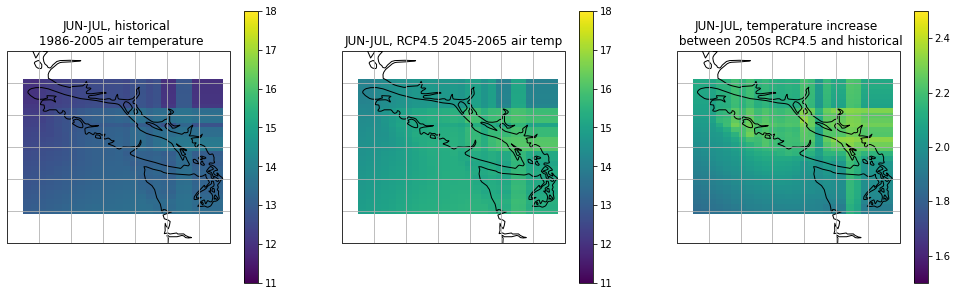

In [9]:
tvmin = 11
tvmax = 18
lat = tas_hist['lat'][:]
lon = tas_hist['lon'][:]-360
lon2d, lat2d = np.meshgrid(lon, lat)
data_hist = np.nanmean(tas_hist['tas'][150:210,:], axis = 0)-273.15
data_RCP45 = np.nanmean(tas_RCP45['tas'][150:210,:], axis = 0)-273.15

#### plot with diffs

central_lon, central_lat = -126, 49
extent = [-129, -122, 46, 52]

plt.figure(figsize=(17, 5))
ax1 = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())

ax1.set_extent(extent)
ax1.gridlines()
ax1.coastlines(resolution='50m')
w = ax1.pcolormesh(lon2d, lat2d, data_hist, vmin = tvmin, vmax = tvmax, transform=ccrs.PlateCarree())
plt.colorbar(w)
ax1.set_title(f'JUN-JUL, historical \n 1986-2005 air temperature')

ax2 = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree())
ax2.set_extent(extent)
ax2.gridlines()
ax2.coastlines(resolution='50m')
w = ax2.pcolormesh(lon2d, lat2d, data_RCP45, vmin = tvmin, vmax = tvmax, transform=ccrs.PlateCarree())
plt.colorbar(w)
ax2.set_title(f'JUN-JUL, RCP4.5 2045-2065 air temp')

ax2 = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree())
ax2.set_extent(extent)
ax2.gridlines()
ax2.coastlines(resolution='50m')
w = ax2.pcolormesh(lon2d, lat2d, data_RCP45-data_hist, vmin = 1.5, vmax = 2.5, transform=ccrs.PlateCarree())
ax2.set_title(f'JUN-JUL, temperature increase \n between 2050s RCP4.5 and historical')
plt.colorbar(w)


## extract by-day means, std, maxs, mins for air temperature

In [10]:
#mean, std, max, min
hist_stats = np.zeros([365,4])
RCP45_stats = np.zeros([365,4])
delta_stats = np.zeros([365,4])
# data_hist = tas_hist['tas'][0,:]-273.15
# data_RCP45 = tas_RCP45['tas'][0,:]-273.15

for i in range(0,365):
    
    data_hist = tas_hist['tas'][i,:]-273.15
    data_RCP45 = tas_RCP45['tas'][i,:]-273.15
    data_delta = data_RCP45-data_hist
    
    hist_stats[i,0] = np.nanmean(data_hist); hist_stats[i,1] = np.nanstd(data_hist);
    hist_stats[i,2] = np.nanmax(data_hist); hist_stats[i,3] = np.nanmin(data_hist);
    RCP45_stats[i,0] = np.nanmean(data_RCP45); RCP45_stats[i,1] = np.nanstd(data_RCP45);
    RCP45_stats[i,2] = np.nanmax(data_RCP45); RCP45_stats[i,3] = np.nanmin(data_RCP45);
    delta_stats[i,0] = np.nanmean(data_delta); delta_stats[i,1] = np.nanstd(data_delta);
    delta_stats[i,2] = np.nanmax(data_delta); delta_stats[i,3] = np.nanmin(data_delta);

    
    

Text(0.5, 1.0, 'average daily $\\Delta$T between historical scenario and RCP4.5')

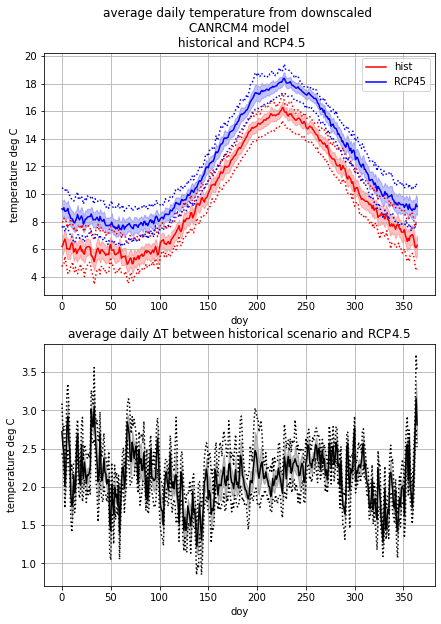

In [11]:
fact = 0.7
fig, axs = plt.subplots(2,1, figsize=(10*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

daze = np.arange(0,365,1)
axs[0].plot(daze,hist_stats[:,0], 'r-', label = 'hist')
axs[0].plot(daze,hist_stats[:,3], 'r:' )
axs[0].plot(daze,hist_stats[:,2], 'r:' )
axs[0].fill_between(daze,hist_stats[:,0]+hist_stats[:,1],\
                    hist_stats[:,0]-hist_stats[:,1], color = 'r', alpha = 0.24 )

axs[0].plot(daze,RCP45_stats[:,0], 'b-', label = 'RCP45')
axs[0].plot(daze,RCP45_stats[:,3], 'b:' )
axs[0].plot(daze,RCP45_stats[:,2], 'b:' )
axs[0].fill_between(daze,RCP45_stats[:,0]+RCP45_stats[:,1],\
                    RCP45_stats[:,0]-RCP45_stats[:,1], color = 'b', alpha = 0.24 )

axs[1].plot(daze,delta_stats[:,0], 'k-', label = 'delta')
axs[1].plot(daze,delta_stats[:,3], 'k:' )
axs[1].plot(daze,delta_stats[:,2], 'k:' )
axs[1].fill_between(daze,delta_stats[:,0]+delta_stats[:,1],\
                    delta_stats[:,0]-delta_stats[:,1], color = 'k', alpha = 0.24 )

for i in range(0,2):
    axs[i].set_xlabel('doy')
    axs[i].set_ylabel('temperature deg C')
    axs[i].grid()
    
axs[0].legend()
axs[0].set_title('average daily temperature from downscaled \n CANRCM4 model \n historical and RCP4.5')
axs[1].set_title('average daily $\Delta$T between historical scenario and RCP4.5')

Text(0.5, 0, 'month')

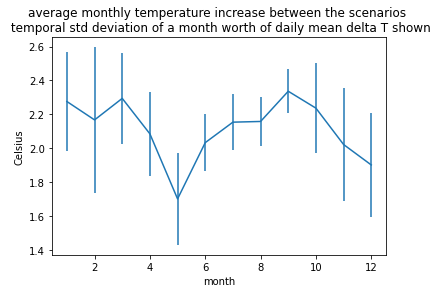

In [13]:
np.nanmean(delta_stats[:,0])
monthly_delta = np.zeros(12)
monthly_std = np.zeros(12)
for i in range(0,12):
    tmonth = np.nanmean(delta_stats[i*30:(i+1)*30,0])
    monthly_std[i] = np.nanstd(delta_stats[i*30:(i+1)*30,0])
    monthly_delta[i]= tmonth

    
plt.errorbar(np.arange(1,13,1), monthly_delta, yerr = monthly_std )
plt.title('average monthly temperature increase between the scenarios \n temporal std deviation of a month worth of daily mean delta T shown')
plt.ylabel('Celsius')
plt.xlabel('month')